In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
coordinates

[(-83.43333374396605, 173.55663989046906),
 (31.652302587005423, 166.45468796120537),
 (69.14528106938832, 4.121287654377056),
 (-64.11598747434904, -149.8090542461338),
 (29.75820575852171, 2.9893298711174623),
 (63.63756342237548, -3.9834749983532447),
 (39.34586746891242, -18.29012819828148),
 (-79.87899356239541, 97.46590838370582),
 (29.109621204373994, 56.22645430357235),
 (55.50500386317697, 167.5303135084402),
 (-64.48994797033795, 156.96278324608676),
 (-53.15479216222791, -31.05815117628552),
 (-25.823076770680586, -117.67120465978275),
 (-79.65601015657708, -65.91377582186539),
 (25.60084038926138, -78.25158148799233),
 (13.492354440289176, -99.10854809849403),
 (1.9673858272557538, -137.9235856895927),
 (31.997545672954047, -178.17727359812977),
 (-49.532378205900834, -107.42048261626044),
 (-3.4174830928077853, 91.22113882483677),
 (-7.928887600565361, 25.937936735570418),
 (57.520715851413, 22.79194747743489),
 (-62.483994460512605, -91.2851794255574),
 (-29.2461852450290

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [9]:
# Create URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [10]:
# Initialize an Empty List and Counters
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters:
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop Through the List of Cities and Build the City URL
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | bud
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | warqla
City not found. Skipping...
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | camacha
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | baft
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | high rock
Processing Record 15 of Set 1 | pinotepa nacional
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | meulaboh
Processing Record 20 of Set 1 | kamina
Processing Record 21 of Set 1 | valdemarpils
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | bambous virieux
Processing Record 24 of Set 1 | port l

Processing Record 38 of Set 4 | sangar
Processing Record 39 of Set 4 | sept-iles
Processing Record 40 of Set 4 | zavyalovo
Processing Record 41 of Set 4 | liberty
Processing Record 42 of Set 4 | moroni
Processing Record 43 of Set 4 | sosnovo-ozerskoye
Processing Record 44 of Set 4 | axim
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | buraydah
Processing Record 47 of Set 4 | joensuu
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | dindori
Processing Record 50 of Set 4 | carnarvon
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | mackay
Processing Record 3 of Set 5 | aguimes
Processing Record 4 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 5 | dudinka
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | bagdarin
Processing Record 8 of Set 5 | joue-les-tours
Processing Record 9 of Set 5 | clyde river
Processing Record 10 of Set 5 | brighton
Processing Record 11 of Set 5 |

Processing Record 27 of Set 8 | sarangani
Processing Record 28 of Set 8 | presidencia roque saenz pena
Processing Record 29 of Set 8 | bergama
Processing Record 30 of Set 8 | san andres
Processing Record 31 of Set 8 | valparaiso
Processing Record 32 of Set 8 | portree
Processing Record 33 of Set 8 | klyuchi
Processing Record 34 of Set 8 | pimentel
Processing Record 35 of Set 8 | humberto de campos
Processing Record 36 of Set 8 | dongsheng
Processing Record 37 of Set 8 | carballo
Processing Record 38 of Set 8 | brae
Processing Record 39 of Set 8 | boa vista
Processing Record 40 of Set 8 | asau
Processing Record 41 of Set 8 | killarney
Processing Record 42 of Set 8 | beni
Processing Record 43 of Set 8 | talaya
Processing Record 44 of Set 8 | bosaso
Processing Record 45 of Set 8 | coxim
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | bubaque
Processing Record 48 of Set 8 | egvekinot
Processing Record 49 of Set 8 | ixtapa
Processing Record 50 of Set 8 | zhigansk
P

Processing Record 20 of Set 12 | mahanoro
Processing Record 21 of Set 12 | obzor
Processing Record 22 of Set 12 | tarata
Processing Record 23 of Set 12 | voh
Processing Record 24 of Set 12 | comodoro rivadavia
Processing Record 25 of Set 12 | manacapuru
Processing Record 26 of Set 12 | lerwick
Processing Record 27 of Set 12 | limenaria
Processing Record 28 of Set 12 | orthez
Processing Record 29 of Set 12 | agboville
Processing Record 30 of Set 12 | bhopal
Processing Record 31 of Set 12 | natchez
Processing Record 32 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 33 of Set 12 | lata
Processing Record 34 of Set 12 | arlit
Processing Record 35 of Set 12 | wanaka
Processing Record 36 of Set 12 | paamiut
Processing Record 37 of Set 12 | uniao
Processing Record 38 of Set 12 | jaljulye
City not found. Skipping...
Processing Record 39 of Set 12 | arkhara
Processing Record 40 of Set 12 | camopi
Processing Record 41 of Set 12 | yialos
City not found. Skipping...
Processing R

In [18]:
len(city_data)

553

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,71.80,85,89,10.56,NZ,2022-02-02 03:02:15
1,Severo-Kurilsk,50.6789,156.1250,31.17,74,100,10.96,RU,2022-02-02 03:02:15
2,Bud,39.4470,-86.1758,51.89,62,100,13.06,US,2022-02-02 03:02:15
3,Mataura,-46.1927,168.8643,71.47,45,98,8.75,NZ,2022-02-02 03:02:16
4,Klaksvik,62.2266,-6.5890,36.52,72,100,21.07,FO,2022-02-02 03:02:16
5,Camacha,33.0833,-16.3333,62.53,77,20,16.11,PT,2022-02-02 03:02:16
6,Albany,42.6001,-73.9662,30.78,71,100,3.00,US,2022-02-02 03:02:17
7,Baft,29.2340,56.6057,34.12,74,0,5.84,IR,2022-02-02 03:02:17
8,Nikolskoye,59.7035,30.7861,22.89,97,99,2.39,RU,2022-02-02 03:02:17
9,Chuy,-33.6971,-53.4616,62.06,77,0,6.67,UY,2022-02-02 03:02:18


In [20]:
# Reorder columns in the dataframe:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-02-02 03:02:15,-46.6000,168.3333,71.80,85,89,10.56
1,Severo-Kurilsk,RU,2022-02-02 03:02:15,50.6789,156.1250,31.17,74,100,10.96
2,Bud,US,2022-02-02 03:02:15,39.4470,-86.1758,51.89,62,100,13.06
3,Mataura,NZ,2022-02-02 03:02:16,-46.1927,168.8643,71.47,45,98,8.75
4,Klaksvik,FO,2022-02-02 03:02:16,62.2266,-6.5890,36.52,72,100,21.07
5,Camacha,PT,2022-02-02 03:02:16,33.0833,-16.3333,62.53,77,20,16.11
6,Albany,US,2022-02-02 03:02:17,42.6001,-73.9662,30.78,71,100,3.00
7,Baft,IR,2022-02-02 03:02:17,29.2340,56.6057,34.12,74,0,5.84
8,Nikolskoye,RU,2022-02-02 03:02:17,59.7035,30.7861,22.89,97,99,2.39
9,Chuy,UY,2022-02-02 03:02:18,-33.6971,-53.4616,62.06,77,0,6.67


In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

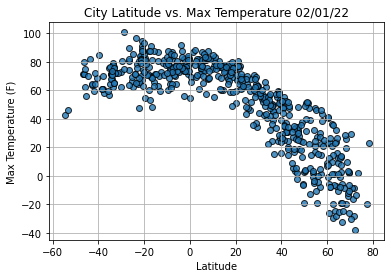

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

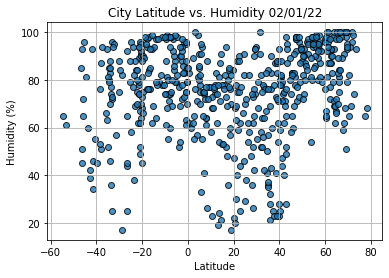

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

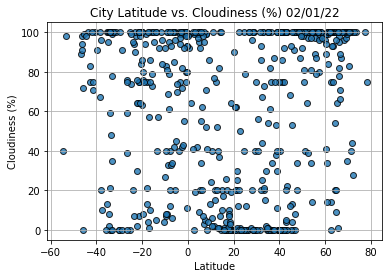

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

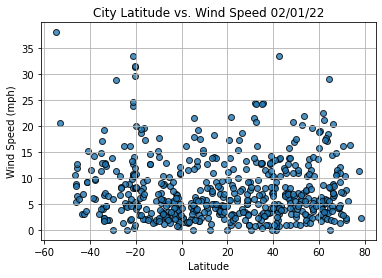

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()